<a href="https://colab.research.google.com/github/sakarla/AI-in-the-Built-Environment/blob/main/week%204_5_Data%20Visualization/Notebook%20code/text_preprocessing_visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text pre-processing and visulization:**
In this section, we will implement several preprocessing techniques on the text data collected previously. The objective of this part is to familiarize you with essential steps that enhance data clarity, ensuring it is well-prepared for the machine learning process.


*    Learn text preprocessing
*    Visualization
  *   Bar chart
  *   Cloud of words
*  Bag-of-words
*  Word2Vec





Let's get started!

# **1. Text preprocessing**

To start, we will link this notebook to your Google Drive. Make sure you are logged in on your Google account

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's combine all the data we've collected to create one file.

You can change the directory to where your files are! (*```folder_path = '/content/drive/MyDrive/Colab Notebooks/text'```*)
Also, you can change the directory where you want to save a new file. (*``` with open('/content/drive/MyDrive/Colab Notebooks/text/combined_data.json', 'w') as f:```*)

In [9]:
import json
import os

#change directory if you need
##################################################################
# Specify the folder containing your JSON files
folder_path = '/content/drive/MyDrive/Colab Notebooks/text'
##################################################################

# List all JSON files in the folder
json_files = [file for file in os.listdir(folder_path) if file.endswith('.json')]

combined_data = []

for file in json_files:
    with open(os.path.join(folder_path, file), 'r') as f:
        data = json.load(f)
        combined_data.extend(data)  # or use `.append(data)` for dictionary data

#change directory if you need
##################################################################
# Save the combined data to a new JSON file
with open('/content/drive/MyDrive/Colab Notebooks/text/combined_data.json', 'w') as f:
    json.dump(combined_data, f, indent=4)
##################################################################


**Step 1.1: Import Libraries**

Make sure to install any libraries that are not already installed by using `!pip install library_name`.

In [3]:
import pandas as pd  #pandas is a powerful library for data manipulation and analysis.
import numpy as np  #numpy is a library for numerical computing.
import re   #re stands for regular expressions, which are used for string matching and manipulation.
import nltk  #nltk is a library for natural language processing (NLP).
from nltk.corpus import stopwords   #stopwords are common words like "and", "the", "is", etc., that are usually removed from text data because they don't carry significant meaning.
from sklearn.feature_extraction.text import CountVectorizer   #CountVectorizer is a tool that converts text data into a matrix of token counts. It's a way to prepare text data for machine learning.


**Step 1.2: Load text File**

Assuming you have a JSON file called **combined_data.json**, you can read it as follows:

In [10]:
import json

###########################################################################
# Load JSON Data
json_file = '/content/drive/MyDrive/Colab Notebooks/text/combined_data.json'  # Replace with the path to your JSON file
###########################################################################

with open(json_file, 'r', encoding='utf-8') as file:
    data = json.load(file)

**Step 1.3: Extract and Preprocess Text Data**

We will extract the text content from the JSON file and preprocess it.

In [11]:
# Initialize an empty list to store text content
text_data = []
#  Extract "content" from JSON
for item in data:
    if 'content' in item:
        text_content = item['content']

        # Join the list of content elements into a single string
        text_content = ' '.join(text_content)
        text_data.append(text_content)


Now, **text_data** contains a list of sentences from your text file.

 Before preprocessing, it's essential to understand your data. You can do this by checking the first few rows of your Data and getting some basic statistics.

In [14]:
# Display the first few sentences
print(text_data[:])  # Replace 5 with the number of sentences you want to display

# Get basic statistics of the text data
print("Number of text:", len(text_data))


['\nProjects\n \nImages\n \nProducts\n \nFolders\n \nFeed\n  This project aims to explore "home" not only as a type of architecture but also as a part of our daily life and identity, which goes beyond any physical location and reflects our relationship with ourselves, others, and the surrounding universe. The concept of "home" in Iran and the world has undergone significant changes over the past few decades, but it can be said that in Iran, the turning point of these changes was in the 1950s. At that time, due to the increase in urban population on the one hand and the increase in oil income and wrong policies of governments on the other hand, "home" turned into a profitable commodity for capital production. This trend became more bureaucratic by the government in the 1970s, and "home" and housing became the most important investment field in Iran. However, for us in the process of designing "House Number 10 Jolfa", there is an opportunity to search for a deeper contemporary meaning of

**Step 1.4: Text Cleaning**

Text data often contains noise that needs to be cleaned. Here are some common text cleaning steps:
*  Lowercasing
*  Removing Special Characters and Numbers
*  Tokenization
*  Stopword Removal

**Lowercasing**: Convert all text to lowercase to ensure consistency.

We convert each sentence in the text data to lowercase.
This helps in maintaining uniformity, as 'Python' and 'python' will be considered the same word.

In [15]:
len(text_data)

2

In [16]:
text_data = [sentence.lower() for sentence in text_data]
print(text_data)

['\nprojects\n \nimages\n \nproducts\n \nfolders\n \nfeed\n  this project aims to explore "home" not only as a type of architecture but also as a part of our daily life and identity, which goes beyond any physical location and reflects our relationship with ourselves, others, and the surrounding universe. the concept of "home" in iran and the world has undergone significant changes over the past few decades, but it can be said that in iran, the turning point of these changes was in the 1950s. at that time, due to the increase in urban population on the one hand and the increase in oil income and wrong policies of governments on the other hand, "home" turned into a profitable commodity for capital production. this trend became more bureaucratic by the government in the 1970s, and "home" and housing became the most important investment field in iran. however, for us in the process of designing "house number 10 jolfa", there is an opportunity to search for a deeper contemporary meaning of

**Removing Special Characters and Numbers:** Remove punctuation, special characters, and numbers using regular expressions.

`sentence.replace('\n', ' ')`: Within each sentence, this part of the code uses the replace method to replace all occurrences of the newline character ('\n') with nothing('').

`r'[^a-zA-Z\s]':` This regular expression pattern matches any character that is not an uppercase or lowercase alphabet letter (a-zA-Z) and not a whitespace character (\s).

In [17]:
text_data = [re.sub(r'[^a-zA-Z\s]', '', sentence.replace('\n', '')) for sentence in text_data]   #sentence.replace('\n', ''): Removes newline characters from each sentence.re.sub(r'[^a-zA-Z\s]', '', sentence): Removes any character that is not a letter or a space.

print(text_data)

['projects images products folders feed  this project aims to explore home not only as a type of architecture but also as a part of our daily life and identity which goes beyond any physical location and reflects our relationship with ourselves others and the surrounding universe the concept of home in iran and the world has undergone significant changes over the past few decades but it can be said that in iran the turning point of these changes was in the s at that time due to the increase in urban population on the one hand and the increase in oil income and wrong policies of governments on the other hand home turned into a profitable commodity for capital production this trend became more bureaucratic by the government in the s and home and housing became the most important investment field in iran however for us in the process of designing house number  jolfa there is an opportunity to search for a deeper contemporary meaning of home therefore this project seeks to interact effecti

**Tokenization:** Split text into individual words or tokens.

In [18]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
text_data = [nltk.word_tokenize(sentence) for sentence in text_data] #nltk.word_tokenize(sentence): Splits each sentence into individual words.Tokenization is crucial for breaking down text into smaller, manageable pieces for analysis.
print(text_data)

[['projects', 'images', 'products', 'folders', 'feed', 'this', 'project', 'aims', 'to', 'explore', 'home', 'not', 'only', 'as', 'a', 'type', 'of', 'architecture', 'but', 'also', 'as', 'a', 'part', 'of', 'our', 'daily', 'life', 'and', 'identity', 'which', 'goes', 'beyond', 'any', 'physical', 'location', 'and', 'reflects', 'our', 'relationship', 'with', 'ourselves', 'others', 'and', 'the', 'surrounding', 'universe', 'the', 'concept', 'of', 'home', 'in', 'iran', 'and', 'the', 'world', 'has', 'undergone', 'significant', 'changes', 'over', 'the', 'past', 'few', 'decades', 'but', 'it', 'can', 'be', 'said', 'that', 'in', 'iran', 'the', 'turning', 'point', 'of', 'these', 'changes', 'was', 'in', 'the', 's', 'at', 'that', 'time', 'due', 'to', 'the', 'increase', 'in', 'urban', 'population', 'on', 'the', 'one', 'hand', 'and', 'the', 'increase', 'in', 'oil', 'income', 'and', 'wrong', 'policies', 'of', 'governments', 'on', 'the', 'other', 'hand', 'home', 'turned', 'into', 'a', 'profitable', 'commodi

**Stopword Removal:** Remove common stopwords (e.g., "the", "and", "is") to reduce noise.

This step helps in reducing the noise in the data, allowing us to focus on more meaningful words.

In [20]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokens_no_stopwords = [[word for word in sentence if word not in stop_words] for sentence in text_data]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
print(tokens_no_stopwords)

[['projects', 'images', 'products', 'folders', 'feed', 'project', 'aims', 'explore', 'home', 'type', 'architecture', 'also', 'part', 'daily', 'life', 'identity', 'goes', 'beyond', 'physical', 'location', 'reflects', 'relationship', 'others', 'surrounding', 'universe', 'concept', 'home', 'iran', 'world', 'undergone', 'significant', 'changes', 'past', 'decades', 'said', 'iran', 'turning', 'point', 'changes', 'time', 'due', 'increase', 'urban', 'population', 'one', 'hand', 'increase', 'oil', 'income', 'wrong', 'policies', 'governments', 'hand', 'home', 'turned', 'profitable', 'commodity', 'capital', 'production', 'trend', 'became', 'bureaucratic', 'government', 'home', 'housing', 'became', 'important', 'investment', 'field', 'iran', 'however', 'us', 'process', 'designing', 'house', 'number', 'jolfa', 'opportunity', 'search', 'deeper', 'contemporary', 'meaning', 'home', 'therefore', 'project', 'seeks', 'interact', 'effectively', 'context', 'become', 'safe', 'peaceful', 'place', 'restore', 

# **2. Visualization**:
We want to visualize the frequency of words step by step. you can create:
*  Bar chart to display the word frequencies.
*  Cloud of words

# **2.1 bar chart**

**Step 2.1:Import Libraries**

Import the necessary libraries:

In [24]:
import pandas as pd  #Used for data manipulation.
import matplotlib.pyplot as plt  #Used for creating plots and visualizations.
from collections import Counter   # Used for counting the frequency of elements in a list.




**Step 2.2**: Count Word Frequencies

Count the frequency of each word in the preprocessed text data:



In [31]:
# Combine all preprocessed sentences into a single list of words
all_words = [word for sentence in tokens_no_stopwords  for word in sentence]

# Count word frequencies
word_freq = Counter(all_words)


In [32]:
word_freq

Counter({'projects': 2,
         'images': 2,
         'products': 2,
         'folders': 2,
         'feed': 2,
         'project': 2,
         'aims': 1,
         'explore': 1,
         'home': 10,
         'type': 1,
         'architecture': 2,
         'also': 2,
         'part': 1,
         'daily': 3,
         'life': 3,
         'identity': 1,
         'goes': 1,
         'beyond': 3,
         'physical': 2,
         'location': 2,
         'reflects': 1,
         'relationship': 2,
         'others': 1,
         'surrounding': 2,
         'universe': 1,
         'concept': 3,
         'iran': 3,
         'world': 1,
         'undergone': 1,
         'significant': 2,
         'changes': 3,
         'past': 1,
         'decades': 2,
         'said': 1,
         'turning': 2,
         'point': 1,
         'time': 2,
         'due': 2,
         'increase': 2,
         'urban': 1,
         'population': 2,
         'one': 4,
         'hand': 3,
         'oil': 1,
         'income':

**Step 2.3**: Visualize Word Frequencies

Visualize the word frequencies using a bar chart:

This code will count the frequencies of words in the preprocessed text data and create a bar chart to visualize the top N most common words. You can adjust the value of N to display more or fewer words in the chart.

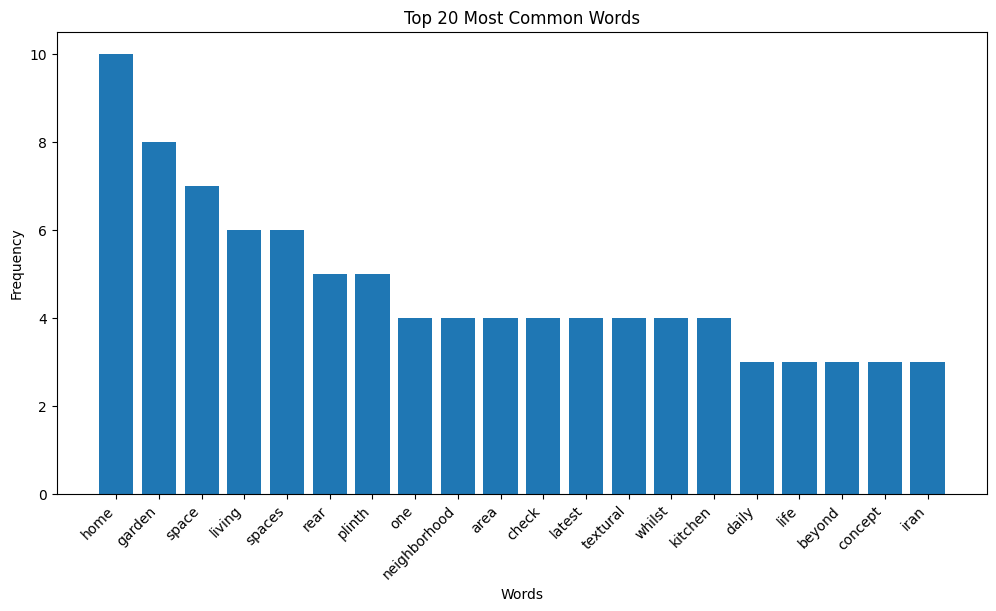

In [33]:
# Get the top N most common words
N = 20  # Change this value to display more or fewer words
most_common_words = word_freq.most_common(N)

# Extract the words and their frequencies
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.title(f"Top {N} Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()


# **2.2 Create Cloud words:**

**Step 1:** Import Libraries

Import the necessary libraries:

In [35]:
from wordcloud import WordCloud   #Used for generating word clouds.
import matplotlib.pyplot as plt   #Used for displaying the word cloud.


**Step 2:** Combine Preprocessed Text

Combine all the preprocessed sentences into a single text:

In [36]:
combined_text = " ".join([" ".join(sentence) for sentence in tokens_no_stopwords]) #We join all the words from the preprocessed sentences into a single string.
print(combined_text)

projects images products folders feed project aims explore home type architecture also part daily life identity goes beyond physical location reflects relationship others surrounding universe concept home iran world undergone significant changes past decades said iran turning point changes time due increase urban population one hand increase oil income wrong policies governments hand home turned profitable commodity capital production trend became bureaucratic government home housing became important investment field iran however us process designing house number jolfa opportunity search deeper contemporary meaning home therefore project seeks interact effectively context become safe peaceful place restore lost tranquility residents question whether retrieving contemporary meaning home response current conditions provide better living resilient space humans today difficult geography facing challenges located jolfa neighborhood next vank cathedral place designated order shah abbas safav

**Step 3:** Generate the Word Cloud

Generate the word cloud from the combined text:

In [39]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)  #Sets the width of the word cloud image to 800 pixels. This controls how wide the image will be.


**Step 4:** Display the Word Cloud

Display the word cloud using matplotlib:

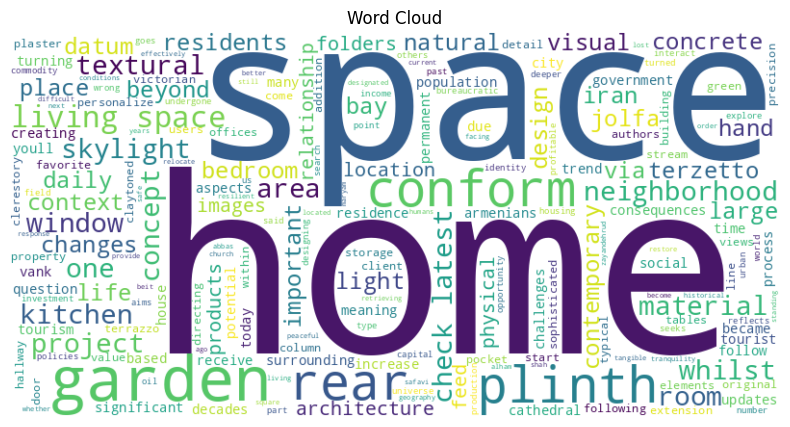

In [40]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()


# **3. Bag- of-words**

Bag of Words is a simple text representation method where each document is represented by a fixed-length vector. Each element of the vector corresponds to the frequency of a word in the document.
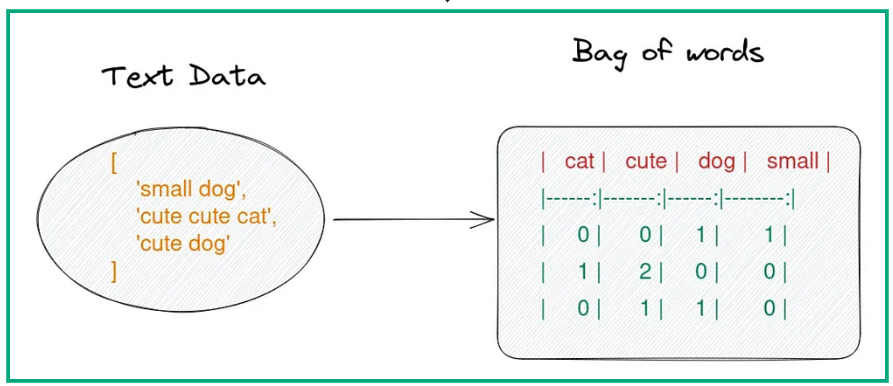

In [44]:
from sklearn.feature_extraction.text import CountVectorizer  #CountVectorizer is a class from the sklearn (scikit-learn) library that converts a collection of text documents to a matrix of token counts.

# Flatten the token list into strings for vectorization
flattened_text = [' '.join(token) for token in tokens_no_stopwords]

# create the vocabulary
vectorizer = CountVectorizer()

# fit the vocabulary to the text data
vectorizer.fit(flattened_text)  #This step creates a mapping from words to indices.

# create the bag-of-words model
bow_model = vectorizer.transform(flattened_text)   #This method returns a sparse matrix where each row represents a document, and each column represents a word from the vocabulary. The value in each cell is the frequency of the word in the document.

# print the bag-of-words model
print(bow_model)   #(0, 0): This means the word at index 0 in the vocabulary appears in document 0.
                   #1: The number after the tuple indicates the frequency of the word in the document.
                   #Therefore, (0, 0) 1 means that the word at index 0 appears once in the first document.

  (0, 0)	1
  (0, 2)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 19)	2
  (0, 20)	1
  (0, 21)	2
  (0, 24)	2
  (0, 25)	1
  (0, 26)	1
  (0, 27)	1
  (0, 29)	2
  (0, 30)	1
  (0, 33)	1
  (0, 35)	1
  (0, 36)	1
  (0, 37)	1
  (0, 41)	1
  (0, 43)	1
  (0, 45)	1
  (0, 48)	2
  (0, 51)	1
  :	:
  (1, 396)	1
  (1, 400)	2
  (1, 402)	1
  (1, 403)	1
  (1, 405)	1
  (1, 408)	1
  (1, 410)	1
  (1, 411)	2
  (1, 413)	1
  (1, 414)	3
  (1, 415)	2
  (1, 416)	2
  (1, 417)	1
  (1, 418)	3
  (1, 419)	1
  (1, 422)	4
  (1, 423)	2
  (1, 424)	2
  (1, 425)	1
  (1, 426)	1
  (1, 427)	1
  (1, 428)	2
  (1, 430)	1
  (1, 434)	1
  (1, 436)	1


The bow_model variable is a sparse matrix that contains the frequency of each word in the vocabulary for each text document in the *text_data list*. You can access the vocabulary and the mapping from words to indices using the *vocabulary_ attribute* of the *CountVectorizer* object.

In [46]:
# print the vocabulary
print(vectorizer.vocabulary_)  #vectorizer.vocabulary_ is a dictionary where the keys are words from the vocabulary and the values are the corresponding indices.
                                #This dictionary shows the mapping of each word in the vocabulary to a unique index used in the Bag of Words model.

# print the word-to-index mapping
print(vectorizer.vocabulary_['images'])   #This line of code retrieves the index of the word 'images' from the vocabulary.

{'projects': 293, 'images': 191, 'products': 290, 'folders': 154, 'feed': 150, 'project': 292, 'aims': 9, 'explore': 144, 'home': 179, 'type': 399, 'architecture': 19, 'also': 11, 'part': 262, 'daily': 99, 'life': 214, 'identity': 187, 'goes': 167, 'beyond': 36, 'physical': 271, 'location': 221, 'reflects': 307, 'relationship': 310, 'others': 261, 'surrounding': 368, 'universe': 404, 'concept': 73, 'iran': 204, 'world': 431, 'undergone': 401, 'significant': 341, 'changes': 53, 'past': 263, 'decades': 102, 'said': 330, 'turning': 398, 'point': 280, 'time': 384, 'due': 125, 'increase': 195, 'urban': 406, 'population': 283, 'one': 253, 'hand': 173, 'oil': 252, 'income': 194, 'wrong': 432, 'policies': 281, 'governments': 169, 'turned': 397, 'profitable': 291, 'commodity': 68, 'capital': 45, 'production': 289, 'trend': 395, 'became': 29, 'bureaucratic': 41, 'government': 168, 'housing': 183, 'important': 193, 'investment': 203, 'field': 151, 'however': 184, 'us': 407, 'process': 288, 'desig

## **Alternatives to a Bag-of-Words in Python**

When representing text data in natural language processing (NLP) tasks, several alternatives to the bag-of-words model can be more effective:

### 1. N-grams
- **Definition**: Contiguous sequences of n words in a text document.
- **Usefulness**: Captures the relationship between adjacent words, helpful for understanding word order and meaning.

### 2. Word Embeddings
- **Definition**: Dense, low-dimensional representations of words.
- **Usefulness**: Captures the semantic relationships between words, representing their meaning and relationships.

### 3. Part-of-Speech Tags
- **Definition**: Identifies the part of speech (e.g., noun, verb, adjective) of each word.
- **Usefulness**: Captures the syntactic structure and relationships between words.

### 4. Named Entity Recognition (NER)
- **Definition**: Identifies and classifies named entities (e.g., people, organizations, locations) in a text document.
- **Usefulness**: Extracts structured information from unstructured text, identifying important entities.

### 5. Syntactic Parsing
- **Definition**: Analyzes the structure of a sentence and determines relationships between words.
- **Usefulness**: Captures the syntactic structure and relationships between words in a text document.


# **4. Word2Vec**
**Word2Vec** is a **word embedding** technique that represents words in continuous vector space where semantically similar words are mapped to nearby points.
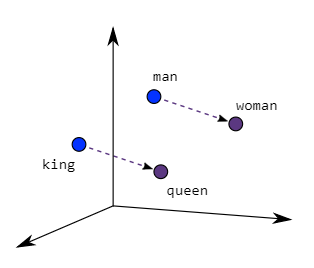

In [48]:
from gensim.models import Word2Vec
# Trains a Word2Vec model with the given parameters.
word2vec_model = Word2Vec(tokens_no_stopwords, vector_size=100, window=5, min_count=1, workers=4)  #Sets the size of the word vectors to 100 dimensions.
                              #window=5: Uses a context window of 5 words.Ignores all words with a total frequency lower than this.
                              #workers=4: Uses 4 CPU cores for training.

# Get the vector for a word
word_vector = word2vec_model.wv['house']  # Retrieves the vector representation of the word 'house'.
print("Word vector for 'house':", word_vector)

# Check similarity between two words
similarity = word2vec_model.wv.similarity('house', 'home')  #Computes the similarity between the words 'house' and 'home'.
print("Similarity between 'house' and 'home':", similarity)   #A higher score (closer to 1) would mean that the words are more similar. A lower score (closer to 0) means they are less similar.

Word vector for 'house': [-5.7531754e-04  6.6862204e-03  5.1439535e-03  8.1989029e-03
  9.0780277e-03 -7.2938078e-03  2.7503003e-03  5.6662383e-03
 -6.3153409e-04  2.4331803e-03  1.1034382e-03  7.5871656e-03
 -6.8922341e-03 -3.5815481e-03 -7.3241945e-03 -7.3304987e-03
  1.2234475e-03  4.4998028e-03 -6.8178563e-03 -9.3952958e-03
  9.3889628e-03  4.0593636e-03 -2.0597330e-03  6.8153786e-03
  9.9722212e-03 -5.2878847e-03  5.8714203e-03 -5.6747925e-03
  4.3796874e-03 -7.6746633e-03 -8.0622304e-03  6.3017001e-03
 -9.8677566e-03 -3.4256915e-03  6.7807715e-03 -6.9839205e-03
  5.5998801e-03  2.0328178e-03 -7.6035452e-03 -9.8929117e-03
  9.3128523e-03 -3.2266960e-03 -3.5737364e-03 -7.2697243e-03
 -7.1251430e-03  3.3556819e-03 -4.6249693e-03  5.9866449e-03
  3.1522773e-03 -6.4320639e-03  2.2124567e-03 -7.2472463e-03
 -9.3708262e-03  5.0375424e-03 -6.1683725e-03  7.6101013e-03
 -6.3785361e-03  6.2126801e-03  9.0218401e-03 -2.9005799e-03
  7.4970052e-03 -7.4363742e-03  4.0127165e-03 -9.5392894e-03

In [49]:
# Find and display the top 10 words similar to 'house'
similar_words = word2vec_model.wv.most_similar('house', topn=10)
print("Top 10 words similar to 'house':")
for word, score in similar_words:
    print(f"{word}: {score}")

Top 10 words similar to 'house':
ventilation: 0.290589302778244
lines: 0.263122022151947
seeking: 0.25368067622184753
lost: 0.24280968308448792
abbas: 0.23027093708515167
trend: 0.21739141643047333
us: 0.21250659227371216
tourism: 0.21196763217449188
significant: 0.2092543989419937
point: 0.204172283411026
